In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pl
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
c_churn=pd.read_csv("churn.csv")
c_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
cust_5=c_churn.iloc[:,4]
cust_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [4]:
cust_15=c_churn.iloc[:,14]
cust_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [5]:
c_random=c_churn[(c_churn['gender']=="Male") & (c_churn["SeniorCitizen"]==1) & (c_churn["PaymentMethod"]=="Electronic check")]

In [6]:
c_random.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [7]:
customer_total_tenure=c_churn[(c_churn["tenure"]>70) | (c_churn["MonthlyCharges"]>100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [8]:
two_mail_yes=c_churn[(c_churn["Contract"]=="Two year")&(c_churn["PaymentMethod"]=="Mailed check")&(c_churn["Churn"]=="Yes")]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [9]:
customer_333=c_churn.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1227,8496-DMZUK,Male,0,No,No,30,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Bank transfer (automatic),90.40,2820.65,No
3661,1142-IHLOO,Female,0,No,No,51,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Credit card (automatic),87.55,4475.9,No
2052,2038-LLMLM,Female,0,No,No,48,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,103.85,4946.05,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
298,2985-JUUBZ,Male,0,Yes,Yes,40,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.55,3015.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,0595-ITUDF,Male,0,Yes,Yes,64,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,91.80,5960.5,No
376,6158-HDPXZ,Male,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,25.35,25.35,No
5088,1399-OUPJN,Female,0,Yes,Yes,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.75,1272.05,No
5380,9689-PTNPG,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.25,144.55,Yes


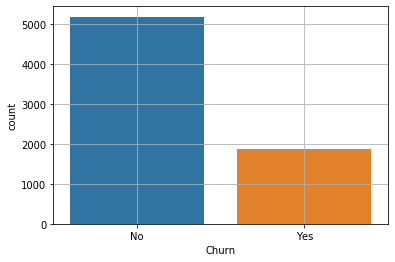

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
counts=c_churn["Churn"].value_counts()
sns.countplot(x="Churn",data=c_churn)
pl.grid()
pl.show()
counts

Text(0.5, 1.0, 'Distribution of Internet Services')

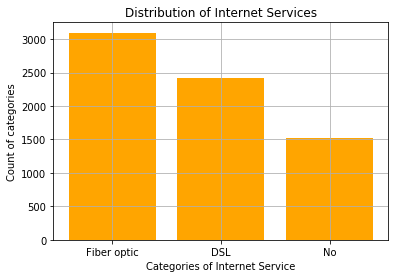

In [39]:
x=c_churn['InternetService'].value_counts().keys().values
y=c_churn["InternetService"].value_counts().values
pl.bar(x,y,color="orange")
pl.grid()
pl.xlabel("Categories of Internet Service")
pl.ylabel("Count of categories")
pl.title("Distribution of Internet Services")

Text(0.5, 1.0, 'Distribution of tenure')

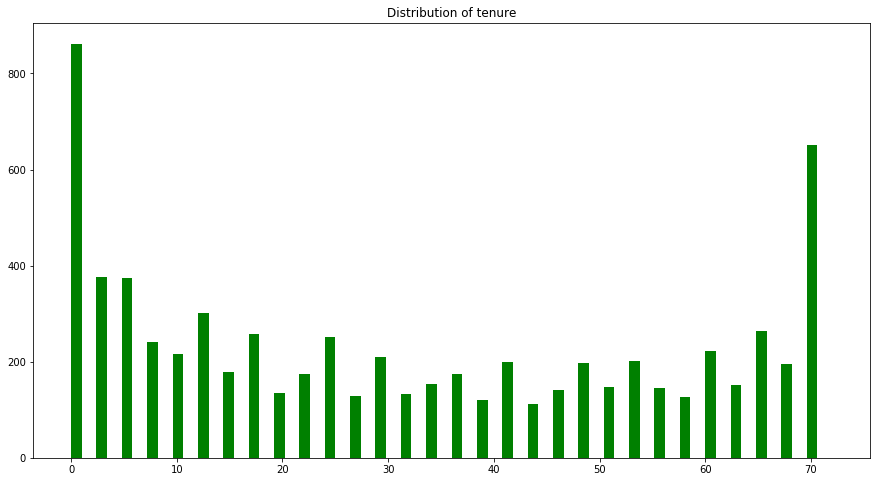

In [12]:
pl.figure(figsize=(15,8))
pl.hist(c_churn["tenure"],bins=30,color="green",width=1)

pl.title("Distribution of tenure")

In [13]:
print(c_churn["tenure"].max())
print(c_churn["tenure"].min())
list(c_churn["tenure"]).count(2)

72
0


238

Text(0.5, 1.0, 'Distribution of tenure vs monthly charges')

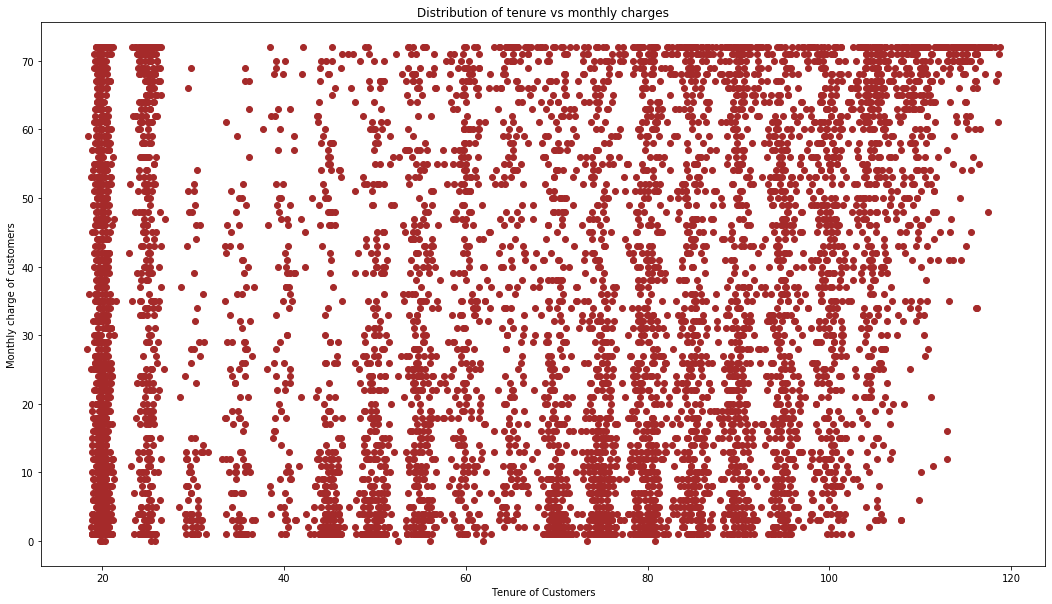

In [14]:
pl.figure(figsize=(18,10))
pl.scatter(c_churn["MonthlyCharges"],c_churn["tenure"],color="brown")
pl.xlabel("Tenure of Customers")
pl.ylabel("Monthly charge of customers")
pl.title("Distribution of tenure vs monthly charges")

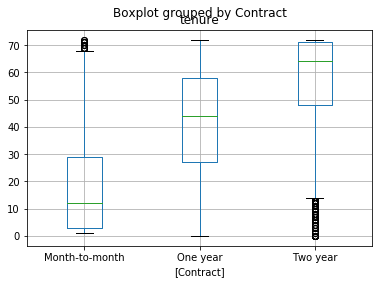

In [15]:
list(c_churn["tenure"])
c_churn.boxplot(column=["tenure"],by=["Contract"])


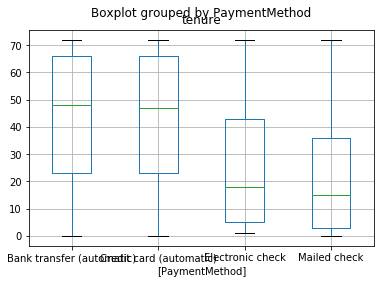

In [16]:
c_churn.boxplot(column=["tenure"],by=["PaymentMethod"])

In [17]:
y=c_churn[["MonthlyCharges"]]
x=c_churn[["tenure"]]
reg=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
reg.fit(x_train,y_train)

#or  x=c_churn[["MonthlyCharges"]]
#    y=c_churn[["tenure"]]
#    reg.fit(x_train,y_train)

y_pred=reg.predict(x_test)
df_prd=pd.DataFrame({   "Actual":x_test["tenure"],
                        "predicted":y_pred.flatten()})
print(y_pred)
df_prd

[[60.95089608]
 [72.98096699]
 [59.1903979 ]
 ...
 [75.62171426]
 [70.63363608]
 [65.6455579 ]]


,Actual,predicted
2200,19,60.950896
4627,60,72.980967
3225,13,59.190398
2828,1,55.669402
3768,55,71.513885
...,...,...
4448,30,64.178476
1231,20,61.244312
3304,69,75.621714
4805,52,70.633636


In [18]:
y_pred[:5],y_test[:5]

(array([[60.95089608],
        [72.98096699],
        [59.1903979 ],
        [55.66940154],
        [71.51388517]]),       MonthlyCharges
 2200           58.20
 4627          116.60
 3225           71.95
 2828           20.45
 3768           77.75)

In [19]:
np.sqrt(mean_squared_error(y_test,y_pred))

29.394584027273893

In [20]:
x=c_churn[["MonthlyCharges","tenure"]]
y=c_churn[["Churn"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
reg=LogisticRegression()
reg.fit(x_train,y_train)
preds=reg.predict(x_test)
preds

c:\users\rinsu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rinsu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [21]:
df=pd.DataFrame({"Given Data":x_test["MonthlyCharges"],
                        "predicted":preds.flatten()})
df
confusion_matrix(y_test,preds),accuracy_score(y_test,preds)

(array([[935, 106],
        [211, 157]], dtype=int64), 0.7750177430801988)

In [24]:
x=c_churn[["tenure"]]
y=c_churn[["Churn"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
reg=DecisionTreeClassifier()
reg.fit(x_train,y_train)
preds=reg.predict(x_test)
preds

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [25]:
confusion_matrix(y_test,preds),accuracy_score(y_test,preds)

(array([[965,  76],
        [281,  87]], dtype=int64), 0.7466288147622427)

In [26]:
confusion_matrix(y_test,preds),accuracy_score(y_test,preds)

(array([[965,  76],
        [281,  87]], dtype=int64), 0.7466288147622427)